## init

load test data (if not loaded from outside)

In [1]:
# check if IS_MASTER exists, this variable will only exist if it's being called by MASTER notebook.
# if it does not exist, set it to False



try: use_MASTER
except: use_MASTER = False

if not use_MASTER:
    #%run imports.ipynb
    from pathlib import Path
    import pickle,os,sys
    home = str(Path.home())
    
    #add the path were the functions are and load the small dataset (used for testing) and config data
    sys.path.append(f'{home}/Desktop/breast_cancer_PHD_research/functions/')
    with open(f'{home}/Dropbox/CyTOF_Breast/data_yishai/default_data.p', 'rb') as f:
      [df,config] = pickle.load(f)
    del f, home
    

# config['show'] = False


import needed packages

In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1' 
import numpy as np
# remove avx warning:
# I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
# To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.

from pandas import DataFrame,Series



ileNotFoundError: [Errno 2] No such file or directory: '/Users/yishai/Desktop/_sample_b2345a_22022024_Data_/5_sampb2345a_reduced_CellIden+EpiCols_Based_shap_classes_class.png'

define classification class

In [3]:

from usefull_functions_new import random_list

from xg_shap import *
# classification = Classification(**config)#build class (either from MASTER or from here) using parent class containg the config data

# if not use_MASTER:
    
#     classification.get_attribute()#print all attributes (config info)      
        

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


get labels for classification

In [4]:
if not use_MASTER:
    samples = Series(df['samp'])
    # .strdrop_duplicates()
    labels = Series(np.random.randint(-1,5,df.shape[0]),index = df.index)#random labels for testing
    
    # the labels of each single sample clustering
    # sample_labels = Series(np.random.randint(-1,5,df.shape[0]),index = df.index)#random labels for testing
    # sample_labels.loc[0],samples.loc[0]=-99,4.0#add error to test error handling
    classes = Series(random_list(LEN = df.shape[0], arr = ['Unknown', 'Noise' ,'Luminal' ,'Basal-like' ,'Cycling']),index = df.index)


In [5]:
# ['Unknown' 'Noise' 'Luminal' 'Basal-like' 'Cycling']
print(classes.unique())
classes1 = classes[(classes=='Basal-like')|(classes=='Luminal')|(classes=='Cycling')].copy()
classes1[(classes=='Basal-like')|(classes=='Luminal')] = 'Lum&Basal'
classes2 = classes[(classes=='Basal-like')|(classes=='Luminal')].copy()

print(classes1.unique())
print(classes2.unique())

['Cycling' 'Basal-like' 'Luminal' 'Unknown' 'Noise']
['Cycling' 'Lum&Basal']
['Basal-like' 'Luminal']


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


FileNotFoundError: [Errno 2] No such file or directory: '/Users/yishai/Desktop/_sample_b2345a_22022024_Data_/5_sampb2345a_reduced_CellIden+EpiCols_Based_shap_classes_class.png'

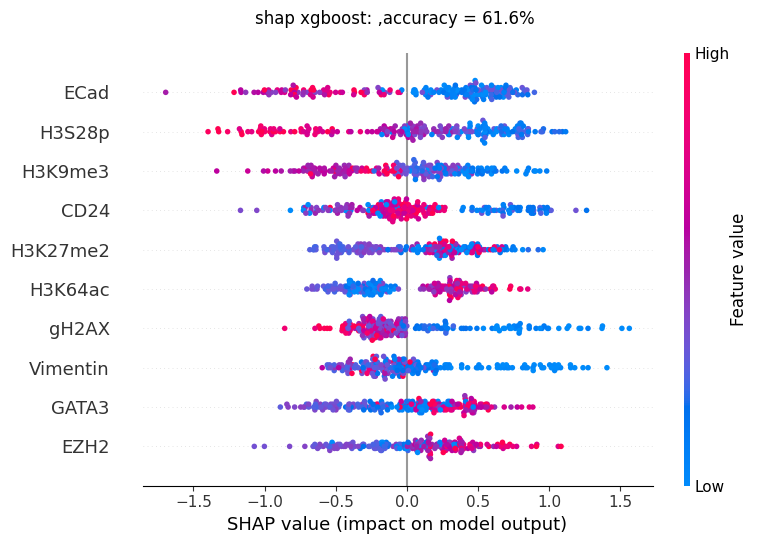

In [9]:
from xg_shap import *


accuracy = xg_classification_shap(df[config['features']].copy(),classes1.copy(), labels !=-1, # drop unclustered rows (clust==-1)
                                config = config,
                                figname='5_'+config['figname']+'shap_classes')
print(f"classes accuracy {config['j']}_{config['feautures_ind']}: {accuracy}%")
